# Introduction to Signals Processing using Python (Part 3) 
In this part, you will learn how to plot sampled signals using matplotlib's plotting functionality. Also, you will learn how to properly define the time and frequency axis which will define be used as x-axis of many of your plots. 

 

## Matplotlib 
[Matplotlib](http://matplotlib.org/index.html) is a python library for creating 2D plots from numpy arrays. It was started as a library to emulate MATLAB's plot functionality and syntax, but it has grown beyond its humble beginning to now offer a full fledged object-oriented 2D plotting library. Matplotlib is designed with the philosophy that one should be able to create simple plots with just a few commands. Yet, one should be able to do all the required fine-tuning, if one so desires, by going deeper into the library. 

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib “state-machine environment” which is provided by the $matplotlib.pyplot$ module. Pyplot’s state-machine environment behaves similarly to MATLAB and should be familiar to users with MATLAB experience.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions <sup> [1][1]</sup>.

For even more control – which is essential for things like embedding matplotlib plots in GUI applications – the pyplot level may be dropped completely, leaving a purely object-oriented approach <sup> [1][1]</sup>. We will not cover this aspect of matplotlib in this tutorial. 

See below a sample example for using pyplot. 


[1]: http://matplotlib.org/faq/usage_faq.html

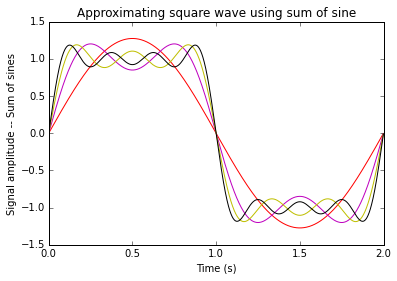

In [26]:
from matplotlib import pyplot as plt # Conventionally advised 
import numpy as np 
from numpy import pi as Pi 


Ts = 0.001 # 1 KHz sampling rate 
T = 2 # 4 sec sample
t= np.arange(0,T,Ts) # linear space between 0

sig1 = (4/Pi)*np.sin((Pi)*t)
sig2 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) 
sig3 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)
sig4 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)+(4/(7*Pi))*np.sin(7*Pi*t)


plt.plot(t,sig1,'r-')
plt.plot(t,sig2,'m-')
plt.plot(t,sig3,'y-')
plt.plot(t,sig4,'k-')

plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude -- Sum of sines')
plt.title('Approximating square wave using sum of sine ')



If you forget about $plt$ prefix before $plot$ for the time being, then all commands above are similar to MATLAB plotting commands.

Plotting library based on pyplot remembers the state. So, once you call the first plot function, a **figure** object is automatically created in the background. You can think of figure object as a logical representation of the complete figure above. Each subsequent call to $plot$ refers to the same figure created with the first call to $plot$, and automatically plots in that figure unless you specifically ask it to create a new figure using 

```python
plt.figure()
```
Then, subsequent call to $plot$ will plot in the newly created figure. This is similar to MATLAB. 

Further, $subplot(numRow,numCol,subID)$ can be called to create figures having multiple subplots. 

 

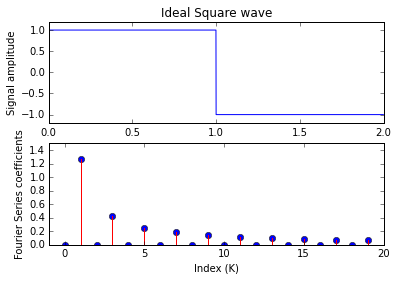

In [41]:
import scipy.signal as signal # 


Ts = 0.001 # 1 KHz sampling rate 
T = 2 # 2 sec sample
t= np.arange(0,T,Ts) # 

square = signal.square(t*Pi)



K = np.arange(20)
C_k = np.array([0 if k%2==0 else 4.0/(k*Pi) for k in K])

plt.subplot(2,1,1)
plt.plot(t,square)

plt.title('Ideal Square wave')
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.axis([0,2,-1.2,1.2])

plt.subplot(2,1,2)
plt.stem(K, C_k,'r')
plt.xlabel('Index (K)')
plt.ylabel('Fourier Series coefficients')
plt.axis([-1,20, 0, 1.5])
plt.show()

$subplot(2,1,1)$ created a $2$-row, $1$-column subplot, and then the last $1$ refers to which subplot is currently active. Subsequent call to $plot$ will automatically plot in that subplot. 

For further details on $pyplot$ style MATLAB-like plotting, you can refer to [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html). 

### Parts of a figure (OOP)
![Parts of a figure](http://matplotlib.org/_images/fig_map.png)
<center>Adopted from Matplotlib website</center>

This figure shows the hierarchical organization of relevant objects in matplotlib environment. This should act as your gateway to any further fine-tuning needed in your plots. Think of figure as a logical representation of every aspect of the plots drawn above. Figure contains **axes** object (The x-y plane above). The first figure instance contain only one axes object, the second figure contains two axes object. Each axes object can have multiple **axis** (e.g. x-axis, y-axis, ..) and they are the number line-like objects above. These axis objects can be used to change the ticks, tick labels, text orientation etc. 

Everything you can see on the figure is an **artist**. This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another <sup>[2][2]</sup>. 

We will not go in systematic detail of how to configure these figure parts, but you are welcome to explore further in [2][2]. I will make use of some aspect of object oriented API when needed, and will explain them if needed. 

[2]: http://matplotlib.org/faq/usage_faq.html

# Defining time and frequency axis
## Time-axis
In DSP, generally signals to be analyzed are time-series data, i.e. each sample is associated with a time at which the sample is recorded.  Generally, signals which are digitialized using an analog-to-digital (ADC) converters have uniform time difference between samples. A bulk of signals you will encounter in real life share this feature, i.e. they are uniformly sampled signals. The sampling rate is determined by the ADC and is known beforehand. We denote the sampling rate as $F_s$ or equivalently we can talk about the time difference between samples and denote it as $T_s = 1/F_s$. 

Defining time-axis for your signal plots is simple. It is generally assumed that the time starts at $t=0$, and you have uniform sampling determined by $T_s$. You can use $np.arange$ if you know the sampling rate and the number of samples. Instead, you can use $np.linspace$ if you know the start and end time and the number of samples. 

In [7]:
import numpy as np
# Method 1 - Using np.arange. 
# No need to know exact time when signal ends. We assume the signal starts at t=0.
TStart = 0.0 
Ts = 0.01 # 100 Hz sampling rate
N = 5000 # number of samples -- You can directly get it from len(signal).
t1 = np.arange(TStart,N*Ts+TStart, Ts)


# Method 2 - Using np.linspace
# You know that there are N samples between start and end. 
TStart = 0.0 
TStop = 50.0 # You recorded till 50 seconds 
N = 5000 # number of samples -- You can directly get it from len(signal)
t2 = np.linspace(TStart, TStop, N, endpoint=False) 
# excluding the endpoint makes intuitive calculation easier, (50.0-0.0)/5000

print t1==t2


[ True  True  True ...,  True  True  True]


It is more a matter of taste as whether you want your time axis to start from $t=0$ or from $t=1/T_s$. In above examples, I chose to start  time from $t=0$. You can choose otherwise as well, but be careful about $np.linspace$.

$np.linspace$ is slightly non-pythonic as it includes both the starting and end point while generating the arithmetic sequence! So, If you want 10 sampling times between t=0 = and t=1 sec, then 

In [10]:
t = np.linspace(0,1,10) 
print t

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


will give me $10$ samples, but they are not spaced apart by $0.1$ sec as you might have thought... so instead you will have to use 

In [12]:
t = np.linspace(0,1,10, endpoint=False)
print t

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


Or better,  you can start time from $1/T_s$ and solve the problem that way, you can use

In [17]:
Ts = 1/10.0 
TStart = Ts 
TEnd = 2.0  
N = 20 

t = np.linspace(TStart, TEnd, N)
print t


[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5
  1.6  1.7  1.8  1.9  2. ]


Choose whatever suits your taste better. Just don't screw up the sampling intervals! 

## Frequency-Axis 

When you take fourier transform of time (or space) domain signals, one thing to be very careful about is the actual interpretation of the frequency axis. Let us see an example to understand various aspects clearly

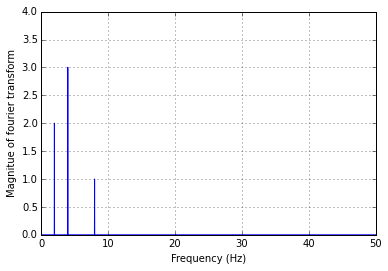

In [36]:
from scipy.fftpack import fft, ifft
Ts = 0.01 # 100 Hz sampling rate
N = 5000 # Total number of samples 
T = N*Ts # Total actual time 
t = np.arange(0,T,Ts)
f1, f2, f3 = 2.0, 4.0, 8.0 

x = 2*np.sin(2*np.pi*f1*t) + 3*np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

X = fft(x) # take the fourier transform 
Fs = 1.0/Ts
f_p = np.arange(0,Fs/2,Fs/N) # linear space between 0 Hz (inclusive) and Fs/2 Hz ( not included)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(f_p, (2.0/N)*np.abs(X[0:N/2]))
plt.axis([0,Fs/2,0,4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitue of fourier transform')
plt.grid()

There are many small things to note and remember here. 
1. By default, you take an $N$ point fourier transform where $N$ is the length of the time domain signal.  
2. **FFT** function returns the fourier transform, but the frequency axis is somewhat scrambled. For real signals (the example above), we only care about the first half fourier transform values. These correspond to $[0,1/2)$ in the normalized frequency axis.  You an multiply the normalized frequency axis with $F_s$ to get the actual frequency axis in Hz. 
3. Negative normalized frequency values $[-1/2,0)$ are stored in the 2nd half of the fourier transform vector X. As you might have noticed, since. 

There are two handy functions which will help you plot fourier transform without always worrying about the limits: $fftfreq$, $fftshift$

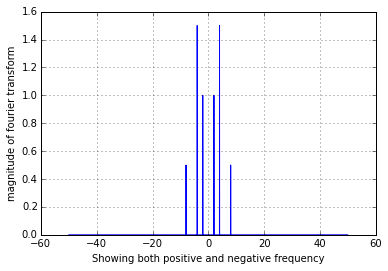

In [35]:
from scipy.fftpack import fftfreq, fftshift
f = fftshift(fftfreq(N,Ts))
plt.plot(f, (1.0/N)*abs(fftshift(X)))
plt.xlabel('Showing both positive and negative frequency')
plt.ylabel('magnitude of fourier transform')
plt.grid()

So, overall you need only keep in mind that after using $fftshift$, the frequency axis corresponds to $[-1/2,1/2)$ in normalized frequency (Cycle/sample), or $[-Fs/2,Fs/2)$ in actual frequency (Hz). This should be intuitive to keen observers as one cannot represent frequency beyond half the sampling rate (Nyquist theorem). 

When you plot frquency response of filters (e.g. by using $scipy.signal.freqz$ function), the frequency axis there is shown  between $[0,\pi)$ (rad/sample) by convention. Here, $\pi$ rad correspond to $1/2$ cycles.  So, this frequency range is same as $[0,1/2)$ in cycles/sample above or $[0,Fs/2) in actual frequency (Hz) if you know the sampling rate. 